In [1]:
import os
import pickle
import matplotlib.pyplot as plt
from scipy.io import loadmat
import h5py
import pandas as pd
import numpy as np

In [2]:
path_imstack = r'\\10.162.80.16\Andre_expansion\data\monkey_fetus\cell_density_validation\im_stack_2_5_new_vol_v3.pkl'

with open(path_imstack, 'rb') as file:
    im_stack = pickle.load(file)

In [421]:
im_stack = [im for i,im in enumerate(im_stack) if i != 711]

In [3]:
def load_var_from_mat(mat_file_name, varname):

    try:
        data = loadmat(mat_file_name)

        var = data[varname]
    except:
        data = h5py.File(mat_file_name, 'r')

        var = data[varname][()]

    return var

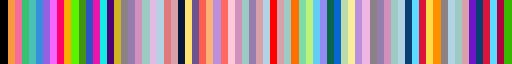

In [4]:
from matplotlib.colors import ListedColormap

cmap_pth = r"\\10.99.68.178\andreex\students\Donald Monkey fetus\codes\monkey\new_cmap_10_16.mat"
cmap_var = load_var_from_mat(cmap_pth, "cmap")
noise_color = np.array([0, 0, 0]).reshape(1,3)
cmap_var = np.concatenate([noise_color, cmap_var], axis=0)/255
#cmap_var = cmap_var/255

cmap_var = ListedColormap(cmap_var)
cmap_var

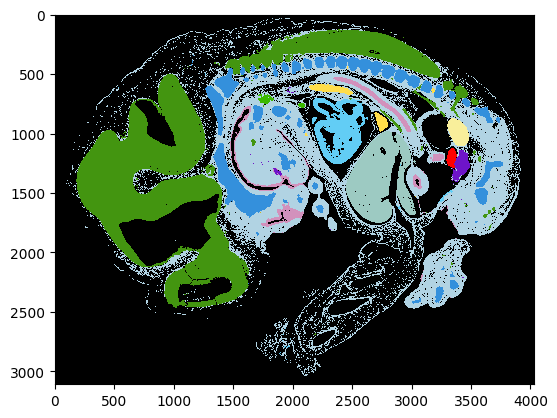

In [5]:
i = 500

im = im_stack[i]

plt.imshow(im, cmap=cmap_var, interpolation='none')
plt.show()

In [7]:
old_labels = []
for j,im in enumerate(im_stack):
    print(j)
    unique = np.unique(im)
    for val in unique:
        if val not in old_labels:
            old_labels.append(val)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [8]:
old_labels = sorted(old_labels)
print(len(old_labels))

92


In [9]:
new_labels = range(0,len(old_labels))

label_mapping = {old_label: new_label for old_label, new_label in zip(old_labels, new_labels)}

In [10]:
label_mapping

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 15: 7,
 17: 8,
 18: 9,
 101: 10,
 102: 11,
 103: 12,
 104: 13,
 105: 14,
 106: 15,
 107: 16,
 201: 17,
 202: 18,
 203: 19,
 204: 20,
 205: 21,
 206: 22,
 207: 23,
 208: 24,
 209: 25,
 210: 26,
 211: 27,
 212: 28,
 301: 29,
 302: 30,
 303: 31,
 304: 32,
 305: 33,
 401: 34,
 402: 35,
 403: 36,
 404: 37,
 405: 38,
 406: 39,
 501: 40,
 502: 41,
 503: 42,
 504: 43,
 505: 44,
 506: 45,
 507: 46,
 508: 47,
 509: 48,
 510: 49,
 601: 50,
 602: 51,
 603: 52,
 604: 53,
 605: 54,
 606: 55,
 607: 56,
 701: 57,
 702: 58,
 703: 59,
 801: 60,
 802: 61,
 803: 62,
 804: 63,
 805: 64,
 806: 65,
 807: 66,
 901: 67,
 902: 68,
 903: 69,
 904: 70,
 905: 71,
 1001: 72,
 1002: 73,
 1003: 74,
 1004: 75,
 1005: 76,
 1101: 77,
 1102: 78,
 1103: 79,
 1104: 80,
 1201: 81,
 1202: 82,
 1203: 83,
 1204: 84,
 1205: 85,
 1206: 86,
 1207: 87,
 1301: 88,
 1302: 89,
 1303: 90,
 1304: 91}

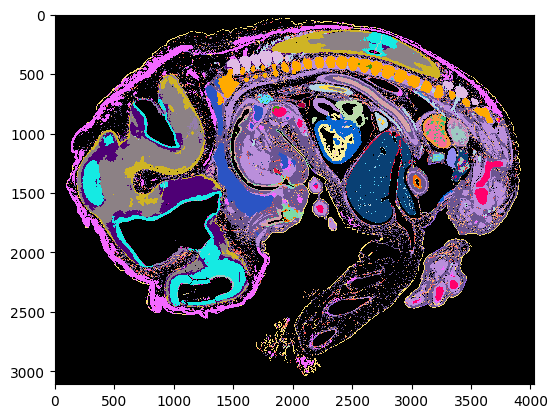

In [11]:
i = 500

im = im_stack[i]
new_im = np.vectorize(label_mapping.get)(im)

plt.imshow(new_im, cmap=cmap_var, interpolation='none')
plt.show()

Load pickled files

In [337]:
skipped = [193]

pickled_features_path = r'\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\stardist_feature_df_pickles'
features_list = os.listdir(pickled_features_path)
features_list = sorted([os.path.join(pickled_features_path,f) for k,f in enumerate(features_list) if f.endswith('.pkl') and k not in skipped])

In [466]:
pth_crop_info_dir = r'\\10.99.68.178\andreex\data\monkey fetus\gestational 40\2_5x\cropped_images\bounding_boxes'
crop_mat_list = sorted(os.listdir(pth_crop_info_dir))
crop_mat_list = [file for k, file in enumerate(crop_mat_list) if 'monkey' in file and "0726" not in file and k not in skipped]

crop_data = []

for i, file in enumerate(sorted(crop_mat_list)):
    mat_file_name = os.path.join(pth_crop_info_dir, file)
    try:
        data = loadmat(mat_file_name)

        #print('scipy.io loadmat')
        bb = [int(x) for x in data['bb']]
        crop_data.append(bb)
        #print(bb)

    except:
        data = h5py.File(mat_file_name, 'r')

        #print('h5py')
        bb = [int(x) for x in data['bb'][()]]
        crop_data.append(bb)
        #print(bb)

In [341]:
pth_pixel_res = r'\\10.99.68.178\andreex\data\monkey fetus\gestational 40\segmentation_analysis\pix_res_info'
pixel_res_info = sorted(os.listdir(pth_pixel_res))
pixel_res_files = [os.path.join(pth_pixel_res,file) for file in pixel_res_info if file.endswith('.mat')]
pixel_res_files_fixed = [j for i, j in enumerate(pixel_res_files) if "0726" not in j and i not in skipped]

In [342]:
print(len(pixel_res_files_fixed))
print(len(features_list))
print(len(crop_mat_list))

1152
1152
1152


In [343]:
for i,j,k in zip(features_list, pixel_res_files_fixed, crop_mat_list):
    print(i)
    print(j)
    print(k)
    print()

\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\stardist_feature_df_pickles\monkey_fetus_40_0001.pkl
\\10.99.68.178\andreex\data\monkey fetus\gestational 40\segmentation_analysis\pix_res_info\monkey_fetus_40_0001.mat
monkey_fetus_40_0001.mat

\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\stardist_feature_df_pickles\monkey_fetus_40_0002.pkl
\\10.99.68.178\andreex\data\monkey fetus\gestational 40\segmentation_analysis\pix_res_info\monkey_fetus_40_0002.mat
monkey_fetus_40_0002.mat

\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\stardist_feature_df_pickles\monkey_fetus_40_0003.pkl
\\10.99.68.178\andreex\data\monkey fetus\gestational 40\segmentation_analysis\pix_res_info\monkey_fetus_40_0003.mat
monkey_fetus_40_0003.mat

\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\stardist_feature_df_pickles\monkey_fetus_40_0004.pkl
\\10.99.68.178\andreex\data\monkey fetus\gestational 40\se

In [428]:
i = 900

crop_data[i]

[1, 3604, 1, 2332]

In [429]:
print(pixel_res_files_fixed[i])
print(crop_mat_list[i])
print(features_list[i])

\\10.99.68.178\andreex\data\monkey fetus\gestational 40\segmentation_analysis\pix_res_info\monkey_fetus_40_0937.mat
monkey_fetus_40_0937.mat
\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\stardist_feature_df_pickles\monkey_fetus_40_0937.pkl


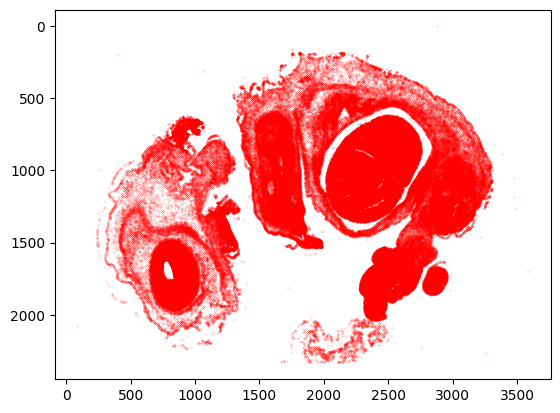

In [430]:
with open(features_list[i], 'rb') as file:
    features = pickle.load(file)

pix_res = float(load_var_from_mat(pixel_res_files_fixed[i], 'pix_res')[0][0][0])
downsize2_5x = 4/pix_res
downsize5x = 2/pix_res

crop_d = [num for num in crop_data[i]]
# I think this part is an artifact from andre's cropping method in matlab, sometimes they were out of order
if crop_d[1] > crop_d[2]:
    temp = crop_d[2]
    crop_d[2] = crop_d[1]
    crop_d[1] = temp

crop_file_data = [(num-1)*downsize2_5x for num in crop_d]
x_offset = crop_file_data[1]
y_offset = crop_file_data[0]

x = features['Centroid_x']
y = features['Centroid_y']

inds = x.index.tolist()  # save ids

x = (features['Centroid_x'] - y_offset) /downsize2_5x
y = (features['Centroid_y'] - x_offset) /downsize2_5x

xy_1 = list(zip(x, y))

xy_filtered_with_indices = [(index, [x, y]) for index, (x, y) in enumerate(xy_1) if 0 <= x < crop_d[2] and 0 <= y < crop_d[3]]

inds = [index for index, _ in xy_filtered_with_indices]
xy = np.array([coordinates for _, coordinates in xy_filtered_with_indices])


plt.scatter(xy[:,0], xy[:,1], c='r', s=0.01)
plt.gca().invert_yaxis()
plt.show()

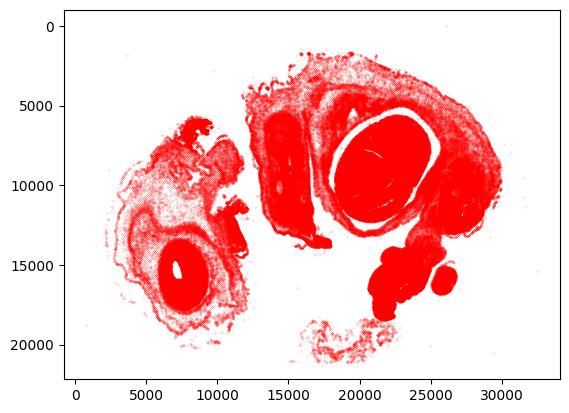

In [431]:
plt.scatter(features['Centroid_x'], features['Centroid_y'], c='r', s=0.01)
plt.gca().invert_yaxis()
plt.show()

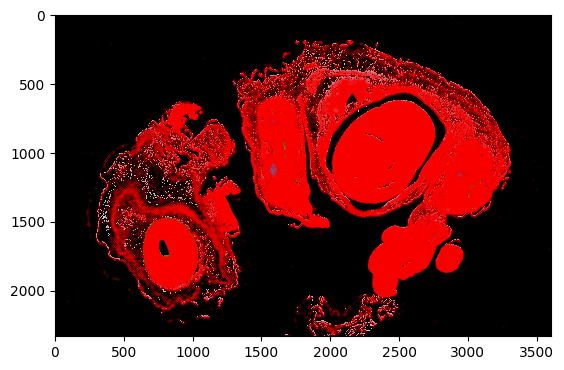

In [432]:
im = im_stack[i]
new_im = np.vectorize(label_mapping.get)(im)

plt.imshow(im, cmap=cmap_var, interpolation='none')

plt.scatter(xy[:,0], xy[:,1], c='r', s=0.01)
#plt.gca().invert_yaxis()

plt.show()

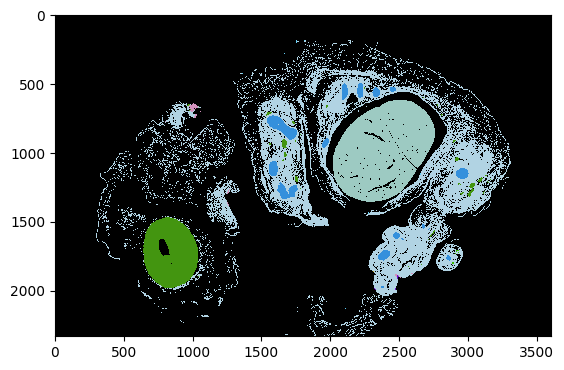

In [433]:
plt.imshow(im, cmap=cmap_var, interpolation='none')

In [445]:
from scipy.io import savemat

In [448]:
crop_data[i]

[1, 3816, 1, 3265]

In [472]:
for i in range(len(features_list)):
    with open(features_list[i], 'rb') as file:
        features = pickle.load(file)
    
    pix_res = float(load_var_from_mat(pixel_res_files_fixed[i], 'pix_res')[0][0][0])
    downsize2_5x = 4/pix_res
    downsize5x = 2/pix_res
    
    crop_d = [num for num in crop_data[i]]
    # I think this part is an artifact from andre's cropping method in matlab, sometimes they were out of order
    if crop_data[0] == 1 and crop_data[2] == 1:
        continue
    else:
        if crop_d[1] > crop_d[2]:
            temp = crop_d[2]
            crop_d[2] = crop_d[1]
            crop_d[1] = temp
    if crop_d[3] - crop_d[1] < 1500 or crop_d[2] - crop_d[0] < 1500:
        crop_d = [crop_d[0],crop_d[1],crop_d[0]+crop_d[2],crop_d[1]+crop_d[3]]
    
    
    
    crop_file_data = [(num-1)*downsize2_5x for num in crop_d]
    x_offset = crop_file_data[1]
    y_offset = crop_file_data[0]
    
    x = features['Centroid_x']
    y = features['Centroid_y']
    
    inds = x.index.tolist()  # save ids
    
    x = (features['Centroid_x'] - y_offset) /downsize2_5x
    y = (features['Centroid_y'] - x_offset) /downsize2_5x
    
    xy_1 = list(zip(x, y))
    
    xy_filtered_with_indices = [(index, [x, y]) for index, (x, y) in enumerate(xy_1) if 0 <= x < (crop_d[2] - crop_d[0]) and 0 <= y < (crop_d[3] - crop_d[1])]
    
    inds = [index for index, _ in xy_filtered_with_indices]
    xy = np.array([coordinates for _, coordinates in xy_filtered_with_indices])
    
    
    
    # save adj pickle xy coords and inds of df
    num = features_list[i].split('\\')[-1][-8:-4]
    outfile = fr'\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\stardist_centroids_adj_w_ind\mat\xy_inds_{num}.mat'
    print(outfile)
    print(crop_d)
    savemat(outfile, {'xy': xy, 'inds': inds})
    
    
    # plt.scatter(xy[:,0], xy[:,1], c='r', s=0.01)
    # plt.gca().invert_yaxis()
    # plt.show()

\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\stardist_centroids_adj_w_ind\mat\xy_inds_0001.mat
[2279, 2910, 5816, 5498]
\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\stardist_centroids_adj_w_ind\mat\xy_inds_0002.mat
[1112, 1049, 4923, 3148]
\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\stardist_centroids_adj_w_ind\mat\xy_inds_0003.mat
[1054, 1241, 4932, 3645]
\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\stardist_centroids_adj_w_ind\mat\xy_inds_0004.mat
[553, 554, 4484, 2751]
\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\stardist_centroids_adj_w_ind\mat\xy_inds_0005.mat
[2559, 2861, 6406, 5630]
\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\stardist_centroids_adj_w_ind\mat\xy_inds_0006.mat
[2032, 2997, 5944, 5569]
\\10.162.80.16\Andre_expansion\data\monkey_fetus\Stardist\StarDist_12_25_23\stardist_centroids_a

In [462]:
crop_d

[2868, 2996, 3360, 2048]

In [457]:
max(xy[:,0])

5308.0

In [22]:
total = 0
for key in np.unique(new_im):
    num = len(np.array([point for point in xy if new_im[int(point[1]), int(point[0])] == key]))
    print(key, num)
    total += num
print(total)

0 26103
7 54
8 102
9 15410
10 1372
11 9112
12 129
13 4104
14 4
15 56
16 10791
17 83
18 21392
19 1144
20 13190
21 438
22 6126
23 2943
24 827
26 10
27 1
28 665
29 1603
30 11
31 529
32 1139
33 270
34 10071
35 85657
36 5628
37 8445
38 49373
39 22343
40 1073
41 4321
42 5
44 0
47 0
48 0
50 315
51 7
53 5
54 215
55 18
56 9
60 76
61 36
62 0
63 4
64 36
65 4
66 0
72 2
73 8
74 0
75 0
76 13
79 2
80 0
82 0
84 16
85 64
87 2
89 33
305389


C:\Users\Donald\AppData\Local\Temp\ipykernel_36468\3604808688.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xy_class_w_ind = np.array([(index, point) for index, point in zip(inds, xy) if new_im[int(point[1]), int(point[0])] == lab])


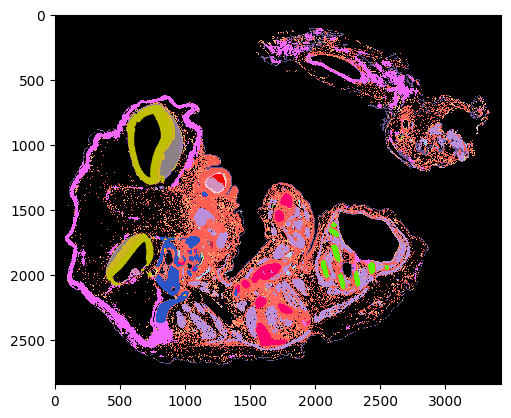

In [26]:
im = im_stack[i]
new_im = np.vectorize(label_mapping.get)(im)

plt.imshow(new_im, cmap=cmap_var, interpolation='none')

lab = 18

#xy_class = np.array([point for point in xy if new_im[int(point[1]), int(point[0])] == lab])
xy_class_w_ind = np.array([(index, point) for index, point in zip(inds, xy) if new_im[int(point[1]), int(point[0])] == lab])

inds_class = [index for index, _ in xy_class_w_ind]
xy_class = np.array([coordinates for _, coordinates in xy_class_w_ind])

plt.scatter(xy_class[:,0], xy_class[:,1], c='y', marker='+', s=1)
#plt.gca().invert_yaxis()

plt.show()

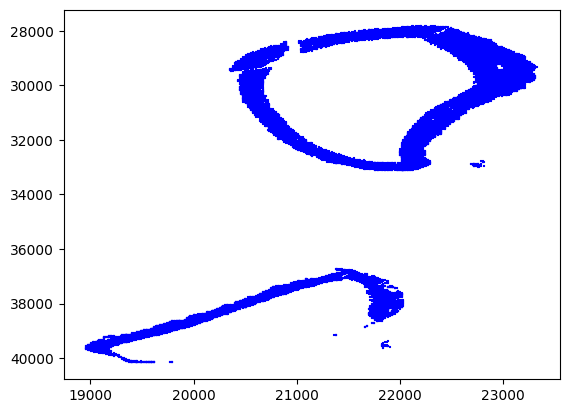

In [27]:
test = features.iloc[inds_class]
plt.scatter(test['Centroid_x'], test['Centroid_y'], c='b', marker='+', s=1)
plt.gca().invert_yaxis()
plt.show()

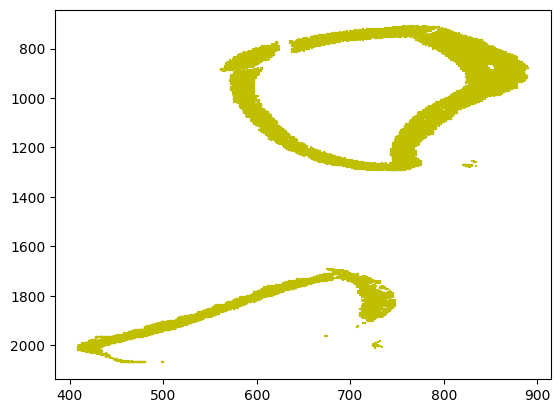

In [28]:
plt.scatter(xy_class[:,0], xy_class[:,1], c='y', marker='+', s=1)
plt.gca().invert_yaxis()
plt.show()

In [29]:
features.iloc[inds_class]

,Centroid_x,Centroid_y,Area,Perimeter,Circularity,Aspect Ratio,compactness,eccentricity,extent,form_factor,maximum_radius,mean_radius,median_radius,minor_axis_length,orientation_degrees,r_mean_intensity,g_mean_intensity,b_mean_intensity
7571,20912.0,28576.0,100.56250,36.562500,0.945312,1.134766,13.296875,0.472656,0.776855,1.057617,6.312500,5.664062,5.714844,10.679688,6924.0,139.1250,112.3125,159.625
7572,21264.0,28304.0,111.62500,38.437500,0.950195,1.179688,13.226562,0.530762,0.775391,1.052734,7.238281,5.957031,5.984375,11.046875,9376.0,141.3750,114.2500,166.625
7573,21376.0,28240.0,149.62500,44.218750,0.960938,1.120117,13.078125,0.450439,0.770020,1.041016,8.023438,6.910156,6.937500,13.164062,5520.0,140.7500,111.0000,164.875
7574,21408.0,28256.0,115.37500,39.437500,0.932617,1.306641,13.468750,0.644043,0.775879,1.072266,8.039062,6.023438,5.738281,10.664062,6828.0,146.6250,116.8125,168.875
7575,22144.0,28224.0,107.12500,37.843750,0.939453,1.187500,13.375000,0.539551,0.772461,1.064453,6.730469,5.843750,5.753906,10.804688,8704.0,150.6250,120.6875,171.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150693,19136.0,39616.0,38.03125,28.640625,0.582520,3.027344,21.562500,0.943848,0.745117,1.716797,6.839844,3.228516,2.589844,4.105469,8432.0,110.1875,85.5625,149.500
150695,21216.0,37056.0,42.90625,25.562500,0.825195,1.439453,15.226562,0.719238,0.762695,1.211914,4.882812,3.660156,3.695312,6.250000,6928.0,145.3750,115.0625,167.750
150704,19024.0,39552.0,29.53125,21.609375,0.793945,1.389648,15.820312,0.694336,0.762207,1.258789,4.480469,2.996094,3.121094,5.277344,6492.0,149.3750,113.8125,164.250
150705,21536.0,36960.0,57.65625,30.062500,0.801758,1.707031,15.671875,0.810547,0.751953,1.247070,6.066406,4.214844,4.136719,6.703125,4320.0,140.2500,106.9375,165.000


In [30]:
def get_class_inds(label, xy, inds, new_im):
    xy_class_w_ind = np.array([(index, point) for index, point in zip(inds, xy) if new_im[int(point[1]), int(point[0])] == label])
    
    inds_class = [index for index, _ in xy_class_w_ind]
    xy_class = np.array([coordinates for _, coordinates in xy_class_w_ind])
    
    return inds_class, xy_class

C:\Users\Donald\AppData\Local\Temp\ipykernel_36468\2063956589.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xy_class_w_ind = np.array([(index, point) for index, point in zip(inds, xy) if new_im[int(point[1]), int(point[0])] == label])


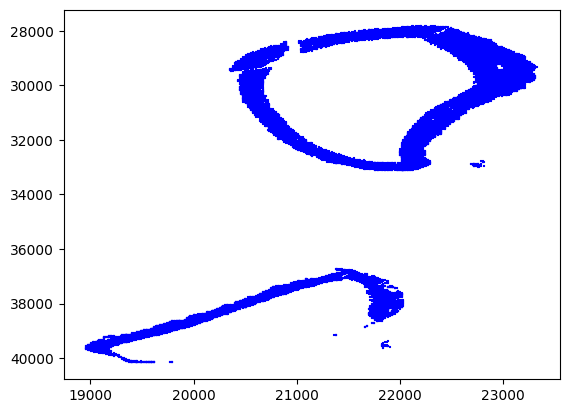

In [31]:
inds_18, xy_18 = get_class_inds(18, xy, inds, new_im)
df_18 = features.iloc[inds_18]
plt.scatter(df_18['Centroid_x'], df_18['Centroid_y'], c='b', marker='+', s=1)
plt.gca().invert_yaxis()
plt.show()

C:\Users\Donald\AppData\Local\Temp\ipykernel_36468\2063956589.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xy_class_w_ind = np.array([(index, point) for index, point in zip(inds, xy) if new_im[int(point[1]), int(point[0])] == label])


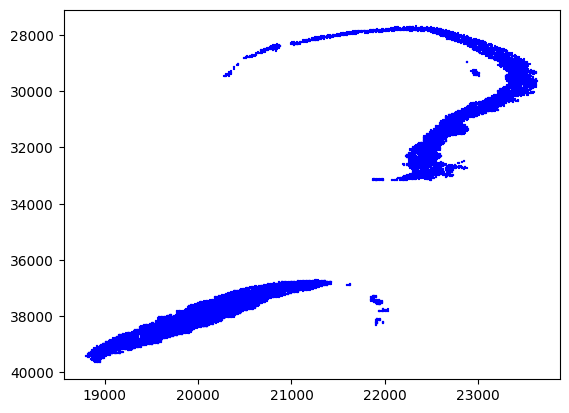

In [32]:
inds_20, xy_20 = get_class_inds(20, xy, inds, new_im)
df_20 = features.iloc[inds_20]
plt.scatter(df_20['Centroid_x'], df_20['Centroid_y'], c='b', marker='+', s=1)
plt.gca().invert_yaxis()

plt.show()

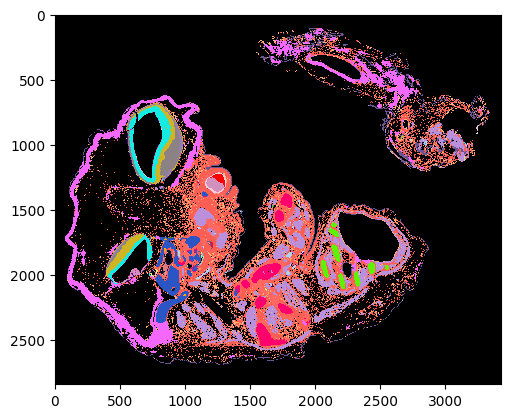

In [33]:
plt.imshow(new_im, cmap=cmap_var, interpolation='none')
plt.show()

In [34]:
ventricular = df_18.drop(columns=['Centroid_x', 'Centroid_y'])
ventricular.dropna(inplace=True)
subventricular = df_20.drop(columns=['Centroid_x', 'Centroid_y'])
subventricular.dropna(inplace=True)

In [35]:
ventricular.head()

,Area,Perimeter,Circularity,Aspect Ratio,compactness,eccentricity,extent,form_factor,maximum_radius,mean_radius,median_radius,minor_axis_length,orientation_degrees,r_mean_intensity,g_mean_intensity,b_mean_intensity
7571,100.5625,36.56250,0.945312,1.134766,13.296875,0.472656,0.776855,1.057617,6.312500,5.664062,5.714844,10.679688,6924.0,139.125,112.3125,159.625
7572,111.6250,38.43750,0.950195,1.179688,13.226562,0.530762,0.775391,1.052734,7.238281,5.957031,5.984375,11.046875,9376.0,141.375,114.2500,166.625
7573,149.6250,44.21875,0.960938,1.120117,13.078125,0.450439,0.770020,1.041016,8.023438,6.910156,6.937500,13.164062,5520.0,140.750,111.0000,164.875
7574,115.3750,39.43750,0.932617,1.306641,13.468750,0.644043,0.775879,1.072266,8.039062,6.023438,5.738281,10.664062,6828.0,146.625,116.8125,168.875
7575,107.1250,37.84375,0.939453,1.187500,13.375000,0.539551,0.772461,1.064453,6.730469,5.843750,5.753906,10.804688,8704.0,150.625,120.6875,171.375


In [36]:
subventricular.head()

,Area,Perimeter,Circularity,Aspect Ratio,compactness,eccentricity,extent,form_factor,maximum_radius,mean_radius,median_radius,minor_axis_length,orientation_degrees,r_mean_intensity,g_mean_intensity,b_mean_intensity
7605,97.500,36.09375,0.939941,1.096680,13.367188,0.411377,0.776855,1.063477,6.550781,5.570312,5.578125,10.695312,8704.0,109.125,75.5000,132.750
7608,132.875,41.87500,0.951660,1.329102,13.203125,0.659180,0.777832,1.050781,7.640625,6.488281,6.484375,11.335938,4504.0,144.500,111.0625,166.125
7640,128.250,41.62500,0.930176,1.227539,13.507812,0.580078,0.768066,1.075195,8.156250,6.343750,6.468750,11.664062,9952.0,132.125,101.4375,158.500
7680,116.250,38.75000,0.972656,1.086914,12.921875,0.392578,0.776855,1.028320,6.757812,6.093750,6.167969,11.734375,6160.0,132.875,98.6250,156.125
7701,98.500,36.62500,0.921875,1.211914,13.632812,0.565430,0.769531,1.084961,7.035156,5.597656,5.578125,10.273438,8408.0,139.250,109.4375,166.250


In [37]:
print(subventricular.columns.tolist())

['Area', 'Perimeter', 'Circularity', 'Aspect Ratio', 'compactness', 'eccentricity', 'extent', 'form_factor', 'maximum_radius', 'mean_radius', 'median_radius', 'minor_axis_length', 'orientation_degrees', 'r_mean_intensity', 'g_mean_intensity', 'b_mean_intensity']


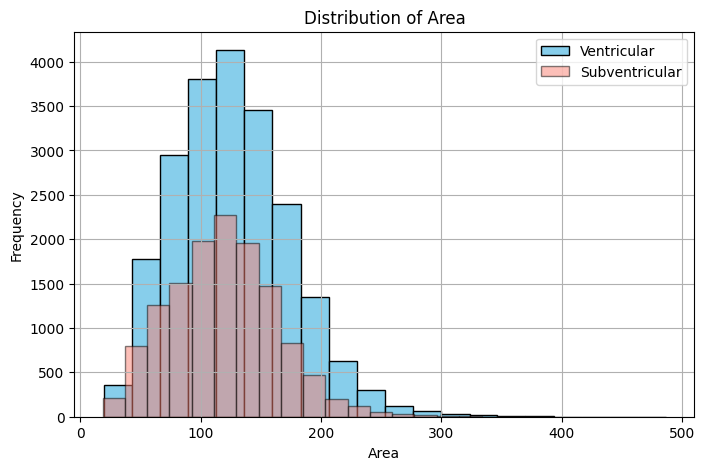

In [38]:
plt.figure(figsize=(8, 5))

feature = 'Area'

plt.hist(ventricular[feature], bins=20, color='skyblue', label='Ventricular', edgecolor='black')
plt.hist(subventricular[feature], bins=20, color='salmon', alpha=0.5, label='Subventricular', edgecolor='black')

plt.title(f'Distribution of {feature}')
plt.xlabel(f'{feature}')
plt.ylabel('Frequency')
plt.legend()  
plt.grid(True)
plt.show()

Text(0, 0.5, 'Mean Blue Intensity')

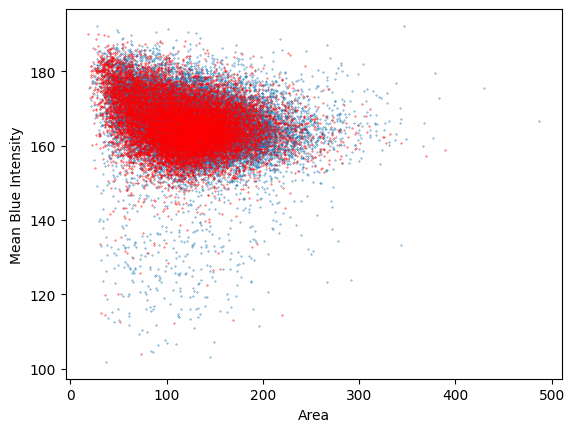

In [40]:
plt.scatter(ventricular['Area'],ventricular['b_mean_intensity'], label='Ventricular', s=0.1)
plt.scatter(subventricular['Area'],subventricular['b_mean_intensity'], label='Subventricular', s=0.1, c='r')
# plt.legend()  
plt.xlabel(f'Area')
plt.ylabel('Mean Blue Intensity')

In [42]:
inds_18, xy_18 = get_class_inds(18, xy, inds, new_im)
df_18 = features.iloc[inds_18]

C:\Users\Donald\AppData\Local\Temp\ipykernel_36468\2063956589.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xy_class_w_ind = np.array([(index, point) for index, point in zip(inds, xy) if new_im[int(point[1]), int(point[0])] == label])


In [43]:
for lab in new_labels:
    print(lab)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91


In [48]:
df_label_dict = {}  # only with stuff

for key in np.unique(new_im):
    num = len(np.array([point for point in xy if new_im[int(point[1]), int(point[0])] == key]))
    inds_key, xy_key = get_class_inds(key, xy, inds, new_im)
    df_key = features.iloc[inds_key]
    print(key, num)
    
    # plt.scatter(df_key['Centroid_x'], df_key['Centroid_y'], c='b', marker='+', s=1)
    # plt.gca().invert_yaxis()
    # plt.show()
    
    df_label_dict[key] = df_key

C:\Users\Donald\AppData\Local\Temp\ipykernel_36468\2063956589.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xy_class_w_ind = np.array([(index, point) for index, point in zip(inds, xy) if new_im[int(point[1]), int(point[0])] == label])


0 26103
7 54
8 102
9 15410
10 1372
11 9112
12 129
13 4104
14 4
15 56
16 10791
17 83
18 21392
19 1144
20 13190
21 438
22 6126
23 2943
24 827
26 10
27 1
28 665
29 1603
30 11
31 529
32 1139
33 270
34 10071
35 85657
36 5628
37 8445
38 49373
39 22343
40 1073
41 4321
42 5
44 0
47 0
48 0
50 315
51 7
53 5
54 215
55 18
56 9
60 76
61 36
62 0
63 4
64 36
65 4
66 0
72 2
73 8
74 0
75 0
76 13
79 2
80 0
82 0
84 16
85 64
87 2
89 33


In [106]:
df_label_dict_1000 = {}  #filter dict such that only classes with over 1000 cells remain
for key, value in df_label_dict.items():
    if len(value) > 1000:
        cls = classes[key]
        print(cls)
        df_label_dict_1000[cls] = value

noise_Noise
skull_skull
bone_ECM
bone_Limbs
bone_Ribs
bone_Pharyngeal
brain_Ventricular
brain_Stroma
brain_Subventricular
brain_Intermediate
brain_Cortical_Plate
ear_Cochlea
ear_Semicircular_Canals
ecm_Skin_Epithelium
ecm_Mesoderm
ecm_Blood_Vessels
ecm_Noise
ecm_Muscle
ecm_Condensed_Mesenchyme
eye_RPE
eye_Outer_retina


In [107]:
print(len(df_label_dict_1000))
print(len(df_label_dict))

21
64


In [110]:
valid_keys

['noise_Noise',
 'skull_skull',
 'bone_ECM',
 'bone_Limbs',
 'bone_Ribs',
 'bone_Pharyngeal',
 'brain_Ventricular',
 'brain_Stroma',
 'brain_Subventricular',
 'brain_Intermediate',
 'brain_Cortical_Plate',
 'ear_Cochlea',
 'ear_Semicircular_Canals',
 'ecm_Skin_Epithelium',
 'ecm_Mesoderm',
 'ecm_Blood_Vessels',
 'ecm_Noise',
 'ecm_Muscle',
 'ecm_Condensed_Mesenchyme',
 'eye_RPE',
 'eye_Outer_retina']

Text(0, 0.5, 'Mean Blue Intensity')

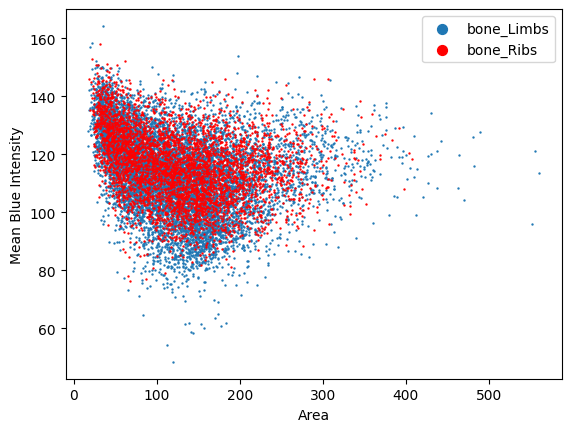

In [118]:
valid_keys = list(df_label_dict_1000.keys())
key1 = 'bone_Limbs'
key2 = 'bone_Ribs'
test1 = df_label_dict_1000[key1]
test2 = df_label_dict_1000[key2]

plt.scatter(test1['Area'],test1['g_mean_intensity'], label=key1, s=0.5)
plt.scatter(test2['Area'],test2['g_mean_intensity'], label=key2, s=0.5, c='r')
plt.legend(markerscale=10)  
plt.xlabel(f'Area')
plt.ylabel('Mean Blue Intensity')

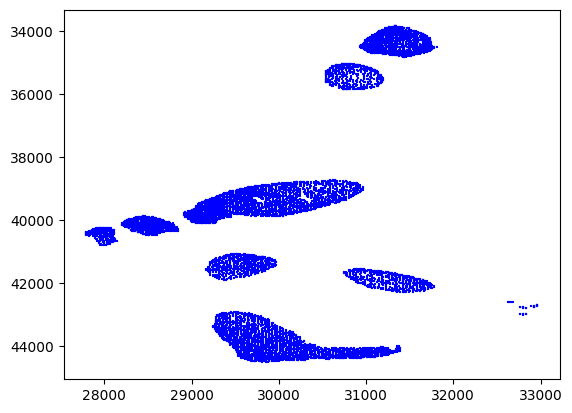

In [119]:
plt.scatter(test1['Centroid_x'], test1['Centroid_y'], c='b', marker='+', s=1)
plt.gca().invert_yaxis()

plt.show()

In [104]:
noise = ['noise_Noise']  # 0 
adrenal = ['adrenal_Stroma', 'adrenal_Cortex', 'adrenal_FetalZone', 'adrenal_Endothelial', 'adrenal_Cells',
           'adrenal_Noise']  # 1, 2, 3, 4, 5, 6
thymus = ['thymus_Thymus']  # 15
bladder = [
    'bladder_bladder']  # 16  # WRONG, should be bladder = ['Bladder'], there is no bladder in this first try, i messed up
skull = ['skull_skull']

bone = ['bone_ECM', 'bone_Limbs', 'bone_Spine', 'bone_Ribs', 'bone_Notochord', 'bone_Hyoid',
        'bone_Pharyngeal']  # 101, 102, 103, 104, 105, 106, 107
brain = ['brain_Non_tissue', 'brain_Ventricular', 'brain_Stroma', 'brain_Subventricular', 'brain_Marginal_Layer',
         'brain_Intermediate', 'brain_Cortical_Plate', 'brain_Choroid_Plexus', 'brain_Pituitary', 'brain_Neural_Canal',
         'brain_Ganglion', 'brain_Nerve']  # 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212
ear = ['ear_Cochlea', 'ear_Nontissue', 'ear_Nerve', 'ear_Semicircular_Canals',
       'ear_Cochlear_Ducts']  # 301, 302, 303, 304, 305
ecm = ['ecm_Skin_Epithelium', 'ecm_Mesoderm', 'ecm_Blood_Vessels', 'ecm_Noise', 'ecm_Muscle',
       'ecm_Condensed_Mesenchyme']  # 401, 402, 403, 404, 405, 406
eye = ['eye_RPE', 'eye_Outer_retina', 'eye_Inner_retina', 'eye_Lens_epithelium', 'eye_Lens_fibers', 'eye_Nerve',
       'eye_Vasculature', 'eye_Non_tissue', 'eye_ECM', 'eye_BP']  # 501, 502, 503, 504, 505, 506, 507, 508, 509, 510
gi = ['gi_Esophagus', 'gi_Stomach', 'gi_Small_Intestines', 'gi_Large_Intestines', 'gi_ECM', 'gi_Nontissue',
      'gi_Ducts']  # 601, 602, 603, 604, 605, 606, 607
gonads = ['gonads_CondensedMesenchyme', 'gonads_Endothelial', 'gonads_Noise']  # 701, 702, 703
heart = ['heart_Ventricular_Myocardium', 'heart_Atria', 'heart_Trabeculae', 'heart_Valves', 'heart_Large_Vessel',
         'heart_Noise', 'heart_ECM']  # 801, 802, 803, 804, 805, 806, 807
kidney = ['kidney_uretericTree', 'kidney_renalVesicle', 'kidney_condensedMesenchyme', 'kidney_looseStroma',
          'kidney_nonTissue']  # 901, 902, 903, 904, 905
liver = ['liver_blood_vessels', 'liver_Liver_ECM', 'liver_Noise', 'liver_Stroma',
         'liver_Gallbladder']  # 1001, 1002, 1003, 1004, 1005
lungs = ['lungs_bronchioles', 'lungs_vasculature', 'lungs_nontissue', 'lungs_collagen']  # 1101, 1102, 1103, 1104
mesokidney = ['mesokidney_Glomerulus', 'mesokidney_Mesonephric_Tubule', 'mesokidney_Bowman_Capsule',
              'mesokidney_Mesonephric_Duct', 'mesokidney_ECM', 'mesokidney_Paramesonephric_Duct',
              'mesokidney_nontissue']  # 1201, 1202, 1203, 1204, 1205, 1206, 1207
thyroid = ['thyroid_Lobe', 'thyroid_Isthmus', 'thyroid_ECM',
           'thyroid_Noise']  # 1301, 1302, 1303, 1304 # don't have bc I typed [15,16] instead of [15,17], need to run code for 5 hours again now

classes = noise + adrenal + thymus + bladder + skull + bone + brain + ear + ecm + eye + gi + gonads + heart + kidney + liver + lungs + mesokidney + thyroid
print(classes)
print(len(classes))

['noise_Noise', 'adrenal_Stroma', 'adrenal_Cortex', 'adrenal_FetalZone', 'adrenal_Endothelial', 'adrenal_Cells', 'adrenal_Noise', 'thymus_Thymus', 'bladder_bladder', 'skull_skull', 'bone_ECM', 'bone_Limbs', 'bone_Spine', 'bone_Ribs', 'bone_Notochord', 'bone_Hyoid', 'bone_Pharyngeal', 'brain_Non_tissue', 'brain_Ventricular', 'brain_Stroma', 'brain_Subventricular', 'brain_Marginal_Layer', 'brain_Intermediate', 'brain_Cortical_Plate', 'brain_Choroid_Plexus', 'brain_Pituitary', 'brain_Neural_Canal', 'brain_Ganglion', 'brain_Nerve', 'ear_Cochlea', 'ear_Nontissue', 'ear_Nerve', 'ear_Semicircular_Canals', 'ear_Cochlear_Ducts', 'ecm_Skin_Epithelium', 'ecm_Mesoderm', 'ecm_Blood_Vessels', 'ecm_Noise', 'ecm_Muscle', 'ecm_Condensed_Mesenchyme', 'eye_RPE', 'eye_Outer_retina', 'eye_Inner_retina', 'eye_Lens_epithelium', 'eye_Lens_fibers', 'eye_Nerve', 'eye_Vasculature', 'eye_Non_tissue', 'eye_ECM', 'eye_BP', 'gi_Esophagus', 'gi_Stomach', 'gi_Small_Intestines', 'gi_Large_Intestines', 'gi_ECM', 'gi_Non

In [105]:
for i,j in zip(old_labels, classes):
    print(i, j)

0 noise_Noise
1 adrenal_Stroma
2 adrenal_Cortex
3 adrenal_FetalZone
4 adrenal_Endothelial
5 adrenal_Cells
6 adrenal_Noise
15 thymus_Thymus
17 bladder_bladder
18 skull_skull
101 bone_ECM
102 bone_Limbs
103 bone_Spine
104 bone_Ribs
105 bone_Notochord
106 bone_Hyoid
107 bone_Pharyngeal
201 brain_Non_tissue
202 brain_Ventricular
203 brain_Stroma
204 brain_Subventricular
205 brain_Marginal_Layer
206 brain_Intermediate
207 brain_Cortical_Plate
208 brain_Choroid_Plexus
209 brain_Pituitary
210 brain_Neural_Canal
211 brain_Ganglion
212 brain_Nerve
301 ear_Cochlea
302 ear_Nontissue
303 ear_Nerve
304 ear_Semicircular_Canals
305 ear_Cochlear_Ducts
401 ecm_Skin_Epithelium
402 ecm_Mesoderm
403 ecm_Blood_Vessels
404 ecm_Noise
405 ecm_Muscle
406 ecm_Condensed_Mesenchyme
501 eye_RPE
502 eye_Outer_retina
503 eye_Inner_retina
504 eye_Lens_epithelium
505 eye_Lens_fibers
506 eye_Nerve
507 eye_Vasculature
508 eye_Non_tissue
509 eye_ECM
510 eye_BP
601 gi_Esophagus
602 gi_Stomach
603 gi_Small_Intestines
604 g

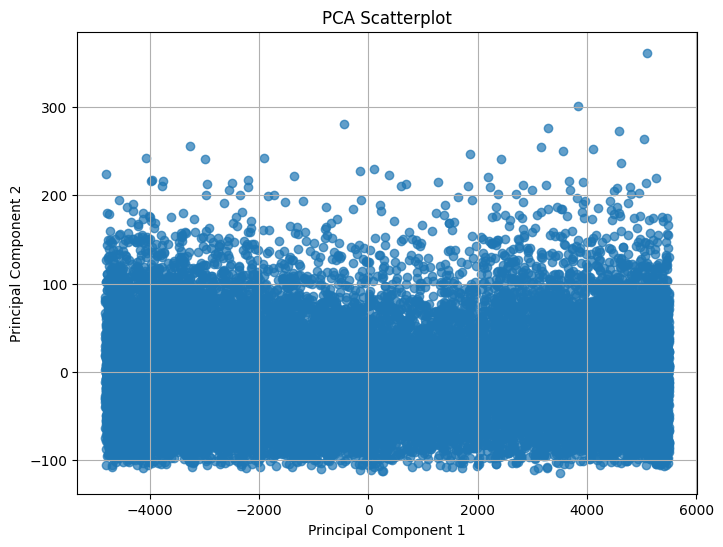

In [393]:
from sklearn.decomposition import PCA

combined_df = pd.concat([ventricular, bone_limbs], axis=0)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(combined_df)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)
plt.title('PCA Scatterplot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [394]:
combined_df

,Area,Perimeter,Circularity,Aspect Ratio,compactness,eccentricity,extent,form_factor,maximum_radius,mean_radius,median_radius,minor_axis_length,orientation_degrees,r_mean_intensity,g_mean_intensity,b_mean_intensity
7571,100.56250,36.562500,0.945312,1.134766,13.296875,0.472656,0.776855,1.057617,6.312500,5.664062,5.714844,10.679688,6924.0,139.125,112.3125,159.625
7572,111.62500,38.437500,0.950195,1.179688,13.226562,0.530762,0.775391,1.052734,7.238281,5.957031,5.984375,11.046875,9376.0,141.375,114.2500,166.625
7573,149.62500,44.218750,0.960938,1.120117,13.078125,0.450439,0.770020,1.041016,8.023438,6.910156,6.937500,13.164062,5520.0,140.750,111.0000,164.875
7574,115.37500,39.437500,0.932617,1.306641,13.468750,0.644043,0.775879,1.072266,8.039062,6.023438,5.738281,10.664062,6828.0,146.625,116.8125,168.875
7575,107.12500,37.843750,0.939453,1.187500,13.375000,0.539551,0.772461,1.064453,6.730469,5.843750,5.753906,10.804688,8704.0,150.625,120.6875,171.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293595,119.93750,42.093750,0.851562,1.396484,14.757812,0.698242,0.758789,1.174805,8.843750,6.039062,5.824219,10.640625,8464.0,164.625,134.6250,180.875
293615,25.00000,21.562500,0.675781,2.128906,18.593750,0.882812,0.725586,1.480469,4.750000,2.666016,2.597656,4.023438,1916.0,153.875,123.5625,172.375
293620,39.59375,24.703125,0.815430,1.380859,15.414062,0.689941,0.763184,1.226562,5.101562,3.519531,3.423828,6.128906,8084.0,155.375,123.0625,172.750
293690,35.84375,26.109375,0.661133,2.253906,19.000000,0.895996,0.757324,1.512695,5.773438,3.218750,3.001953,4.582031,7476.0,161.000,132.5000,177.000
